In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import pprint

import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms

import _init_paths
from config import cfg
from config import update_config
from core.loss import JointsMSELoss
from core.function import validate
from utils.utils import create_logger

# import dataset
import models

In [ ]:
# ------------------------------------------------------------------------------
# pose.pytorch
# Copyright (c) 2018-present Microsoft
# Licensed under The Apache-2.0 License [see LICENSE for details]
# Written by Bin Xiao (Bin.Xiao@microsoft.com)
# ------------------------------------------------------------------------------

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import pprint

import torch
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms

import _init_paths
from config import cfg
from config import update_config
from core.loss import JointsMSELoss
from core.function import validate
from utils.utils import create_logger

import dataset
import models


def parse_args():
    parser = argparse.ArgumentParser(description='Train keypoints network')
    # general
    parser.add_argument('--cfg',
                        help='experiment configure file name',
                        required=True,
                        type=str)

    parser.add_argument('opts',
                        help="Modify config options using the command-line",
                        default=None,
                        nargs=argparse.REMAINDER)

    parser.add_argument('--modelDir',
                        help='model directory',
                        type=str,
                        default='')
    parser.add_argument('--logDir',
                        help='log directory',
                        type=str,
                        default='')
    parser.add_argument('--dataDir',
                        help='data directory',
                        type=str,
                        default='')
    parser.add_argument('--prevModelDir',
                        help='prev Model directory',
                        type=str,
                        default='')

    args = parser.parse_args()
    return args


def main():
    args = parse_args()
    update_config(cfg, args)

    logger, final_output_dir, tb_log_dir = create_logger(
        cfg, args.cfg, 'valid')

    logger.info(pprint.pformat(args))
    logger.info(cfg)

    # cudnn related setting
    cudnn.benchmark = cfg.CUDNN.BENCHMARK
    torch.backends.cudnn.deterministic = cfg.CUDNN.DETERMINISTIC
    torch.backends.cudnn.enabled = cfg.CUDNN.ENABLED

    model = eval('models.'+cfg.MODEL.NAME+'.get_pose_net')(
        cfg, is_train=False
    )

    if cfg.TEST.MODEL_FILE:
        logger.info('=> loading model from {}'.format(cfg.TEST.MODEL_FILE))
        model.load_state_dict(torch.load(cfg.TEST.MODEL_FILE), strict=False)
    else:
        model_state_file = os.path.join(
            final_output_dir, 'final_state.pth'
        )
        logger.info('=> loading model from {}'.format(model_state_file))
        model.load_state_dict(torch.load(model_state_file))

    model = torch.nn.DataParallel(model, device_ids=cfg.GPUS).cuda()

    # define loss function (criterion) and optimizer
    criterion = JointsMSELoss(
        use_target_weight=cfg.LOSS.USE_TARGET_WEIGHT
    ).cuda()

    # Data loading code
    normalize = transforms.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
    )
    valid_dataset = eval('dataset.'+cfg.DATASET.DATASET)(
        cfg, cfg.DATASET.ROOT, cfg.DATASET.TEST_SET, False,
        transforms.Compose([
            transforms.ToTensor(),
            normalize,
        ])
    )
    valid_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=cfg.TEST.BATCH_SIZE_PER_GPU*len(cfg.GPUS),
        shuffle=False,
        num_workers=cfg.WORKERS,
        pin_memory=True
    )

    # evaluate on validation set
    validate(cfg, valid_loader, valid_dataset, model, criterion,
             final_output_dir, tb_log_dir)


if __name__ == '__main__':
    main()


In [14]:
from PIL import Image
import matplotlib.pyplot as plt

model = eval('models.'+cfg.MODEL.NAME+'.get_pose_net')(
        cfg, is_train=False
    )
model.load_state_dict(torch.load(cfg.TEST.MODEL_FILE), strict=False, map_location='cpu')
model.eval()

# dataloader
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

# define the image transform
transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

# load the image
image = Image.open('data/demo.jpg')
image = transform(image)
image = image.unsqueeze(0)

# get the model prediction
with torch.no_grad():
    output = model(image)

# get the keypoint heatmap
pred = output[-1].squeeze().numpy()
plt.imshow(pred)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: ''

In [5]:
model = eval('models.'+cfg.MODEL.NAME+'.get_pose_net')
model(cfg, is_train=True)

KeyError: 'STAGE2'

In [2]:
class Args:
    def __init__(self, cfg, opts=[],modelDir='', logDir='', dataDir='', prevModelDir=''):
        self.cfg = cfg
        self.opts = opts
        self.modelDir = modelDir
        self.logDir = logDir
        self.dataDir = dataDir
        self.prevModelDir = prevModelDir

args = Args(r'C:\Users\Austin\Desktop\2024_ICME_Challenge\Animal-Kingdom\Animal_Kingdom\pose_estimation\code\hrnet\experiments\mpii\vhrbirdpose\w32_256x256_adam_lr1e-3_ak_vhr_s.yaml')

update_config(cfg, args)
model = eval('models.'+cfg.MODEL.NAME+'.get_pose_net')(
        cfg, is_train=False
    )

model.load_state_dict(torch.load(cfg.TEST.MODEL_FILE, map_location=torch.device('cpu')), strict=False)
model.eval()

# dataloader
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
)

# define the image transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    normalize,
])



In [ ]:
# write the pretrained path to the yaml file, and the path to the 
def model_config(pretrained_model=None):
   
    if pretrained_model is None:
        pretrained_model = os.path.join(module_dir, 'modelDir', 'all_animals.pth')
    else: # get the pretrained model path from user
        pretrained_model = os.path.join(pretrained_model)

    # open the yaml file
    with open(yaml_file, 'r') as file:
        # read the yaml file
        data = yaml.load(file, Loader=yaml.FullLoader)
        # update the pretrained path
        data['MODEL']['PRETRAINED'] = pretrained_model
        data['TEST']['MODEL_FILE'] = pretrained_model
    
    with open(yaml_file, 'w') as file:
        # write the updated yaml file
        yaml.dump(data, file)

def data_config(images_path, annotations_path):
    '''
    Args:
    -----------------------------------------
    images_path: str : path to the images
    annotations_path: str : path to the annotations in mpii format

    Function configures the path to the images and the annotations in the yaml file
    '''
    # create a logs and output directory in the users directory
    if os.path.exists(os.path.join(images_path, 'output')) is False:
        os.mkdir(os.path.join(images_path, 'output'))
    if os.path.exists(os.path.join(images_path, 'logs')) is False:
        os.mkdir(os.path.join(images_path, 'logs'))
    # open the yaml file
    with open(yaml_file, 'r') as file:
        # read the yaml file
        data = yaml.load(file, Loader=yaml.FullLoader)
        # update the pretrained path
        data['DATASET']['ROOT'] = annotations_path
        # OUTPUT DIRECTORY IN THE USERS Directory
        data['OUTPUT_DIR'] = os.path.join(images_path, 'output')
        # logs directory in the users directory
        data['LOG_DIR'] = os.path.join(images_path, 'logs')

In [74]:
# load the image
image = Image.open(r'C:\Users\Austin\Desktop\2024_ICME_Challenge\Animal-Kingdom\Animal_Kingdom\pose_estimation\code\hrnet\dataDir\bird.jfif')
image = transform(image)
image = image.unsqueeze(0)

# get the model prediction
with torch.no_grad():
    output = model(image)


In [82]:
print(output.shape)

torch.Size([1, 23, 64, 64])


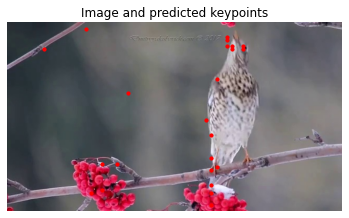

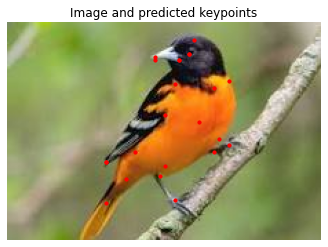

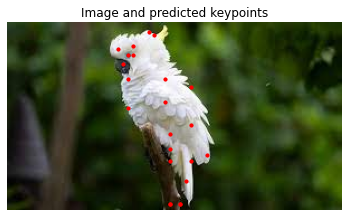

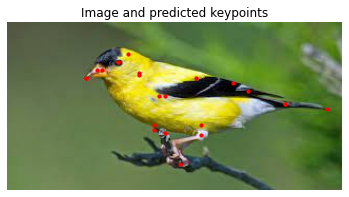

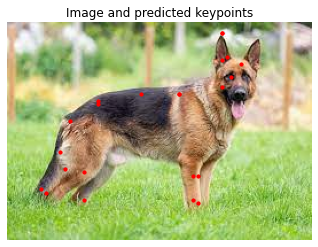

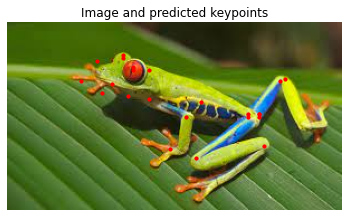

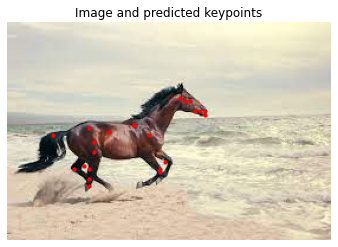

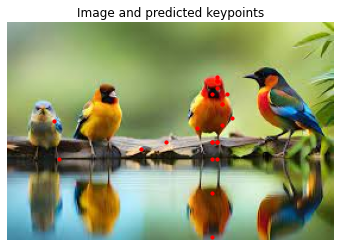

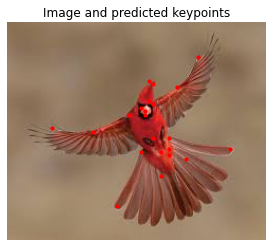

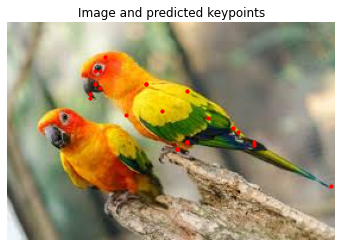

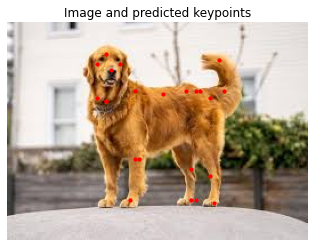

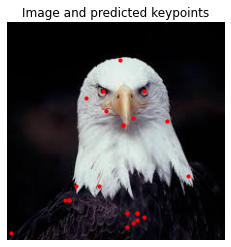

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from pathlib import Path

images_path = os.path.join(Path(os.getcwd()).parent, 'dataDir')


def plot_keypoints(image_path):
     # Load the image
    image = Image.open(image_path)
    # transform the image
    image = transform(image)
    image = image.unsqueeze(0)

    # get the model prediction
    with torch.no_grad():
        output = model(image)
    
    preds = output.squeeze().numpy() # Squeeze to remove the batch dimension and convert to numpy array  
    image = Image.open(image_path) 

    # Plot the image
    plt.imshow(image)
    plt.title('Image and predicted keypoints')
    plt.axis('off')

    # Plot the keypoints
    for i in range(preds.shape[0]):  # Iterate through each keypoint
        keypoint_map = preds[i]  # Get the heatmap for the current keypoint
        max_idx = np.unravel_index(np.argmax(keypoint_map), keypoint_map.shape)  # Get the index of the maximum value in the heatmap
        plt.scatter(max_idx[1]*image.size[0]/64, max_idx[0]*image.size[1]/64, color='red', s=10)  # Plot the keypoint on the image

    plt.show()


for i in os.listdir(images_path):
    if i.endswith('.mp4'):
        continue
    image_path = os.path.join(images_path, i)
    plot_keypoints(image_path)


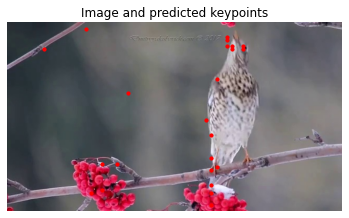

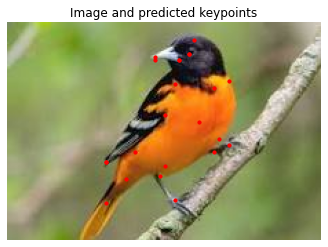

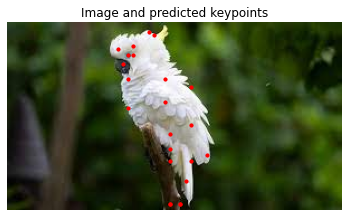

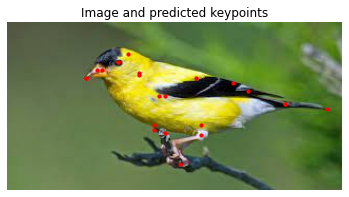

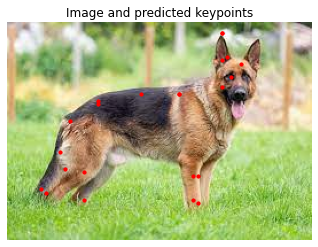

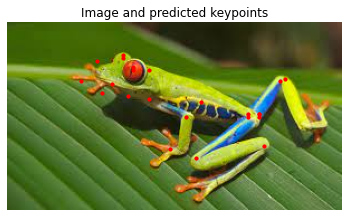

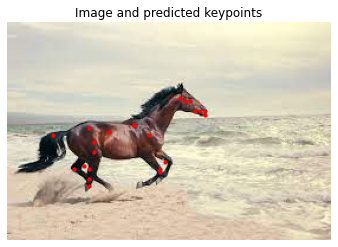

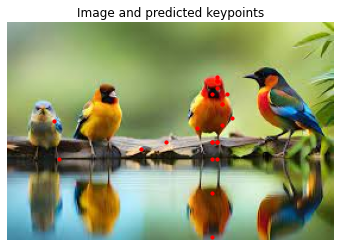

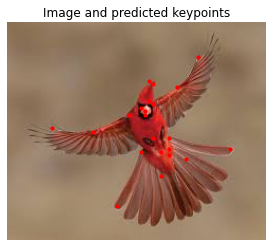

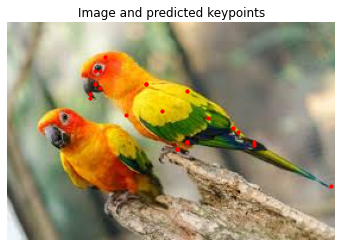

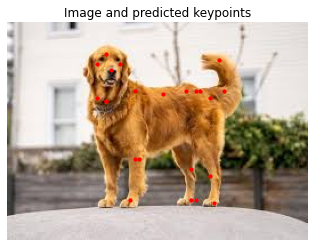

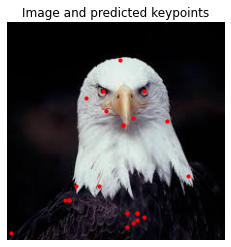

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from pathlib import Path

images_path = os.path.join(Path(os.getcwd()).parent, 'dataDir')


def plot_keypoints(image_path):
     # Load the image
    image = Image.open(image_path)
    # transform the image
    image = transform(image)
    image = image.unsqueeze(0)

    # get the model prediction
    with torch.no_grad():
        output = model(image)
    
    preds = output.squeeze().numpy() # Squeeze to remove the batch dimension and convert to numpy array  
    image = Image.open(image_path) 

    # Plot the image
    plt.imshow(image)
    plt.title('Image and predicted keypoints')
    plt.axis('off')

    # Plot the keypoints
    for i in range(preds.shape[0]):  # Iterate through each keypoint
        keypoint_map = preds[i]  # Get the heatmap for the current keypoint
        max_idx = np.unravel_index(np.argmax(keypoint_map), keypoint_map.shape)  # Get the index of the maximum value in the heatmap
        plt.scatter(max_idx[1]*image.size[0]/64, max_idx[0]*image.size[1]/64, color='red', s=10)  # Plot the keypoint on the image

    plt.show()


for i in os.listdir(images_path):
    if i.endswith('.mp4'):
        continue
    image_path = os.path.join(images_path, i)
    plot_keypoints(image_path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


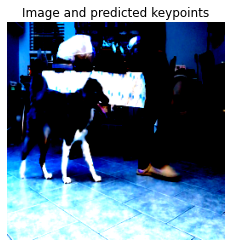

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


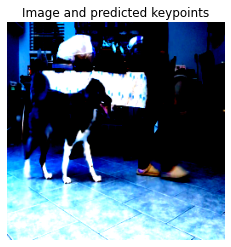

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


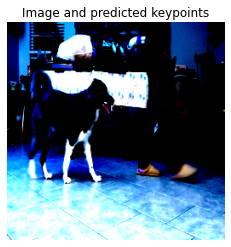

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


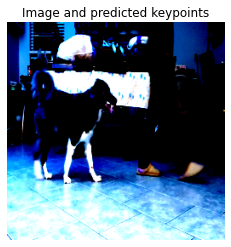

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


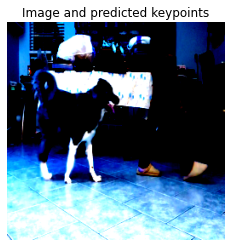

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


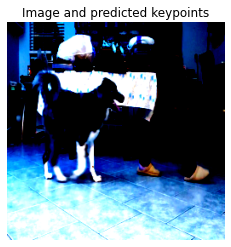

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


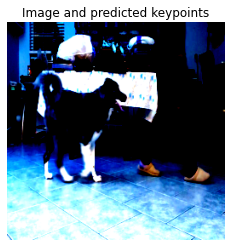

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


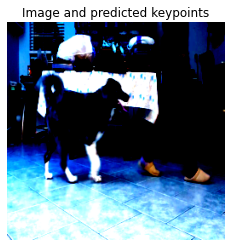

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


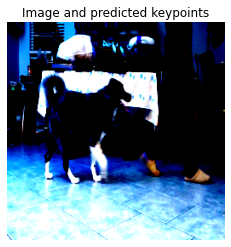

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


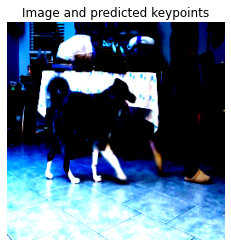

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


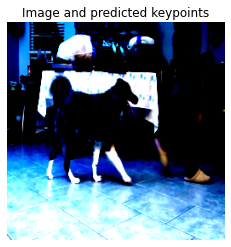

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


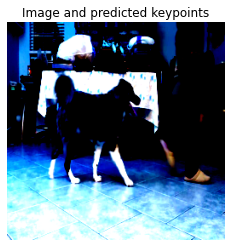

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


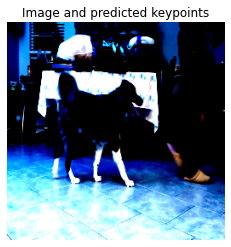

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


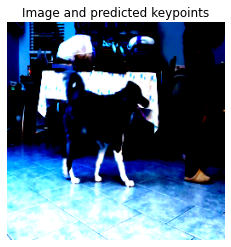

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


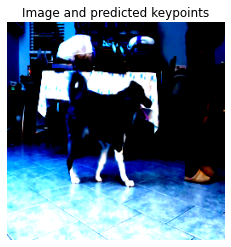

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


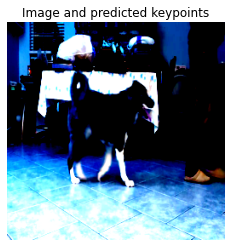

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


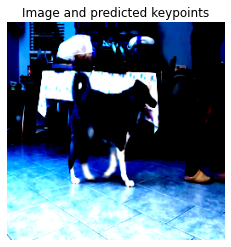

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


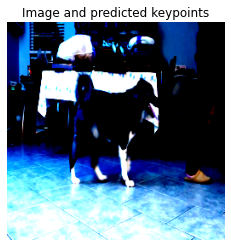

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


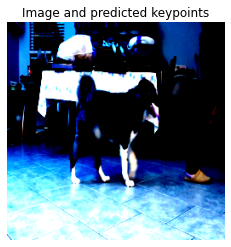

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


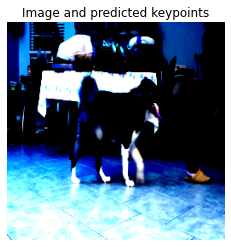

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


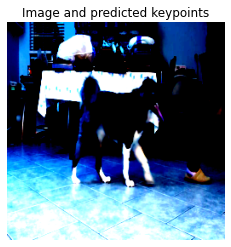

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


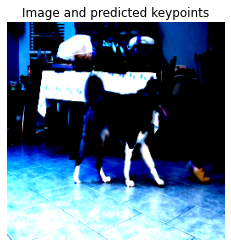

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


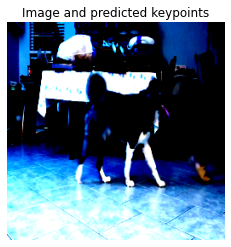

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


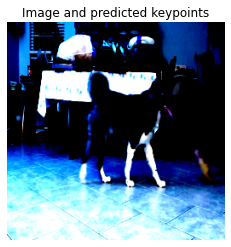

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


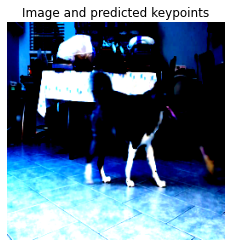

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


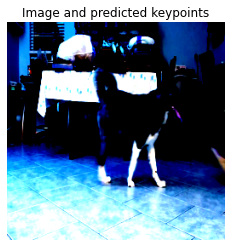

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


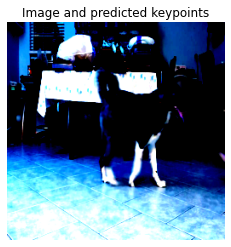

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


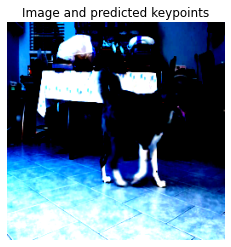

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


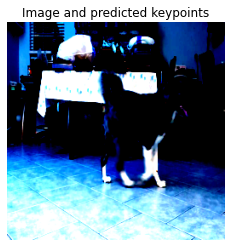

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


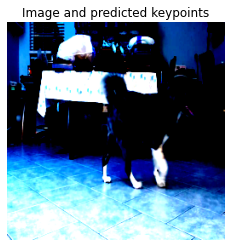

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


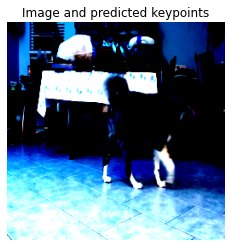

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


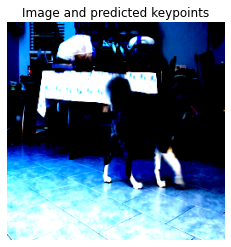

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [13]:
# load a video and write the output to a new video from the model predictions
import cv2
import os
from pathlib import Path

video_path = os.path.join(Path(os.getcwd()).parent, 'dataDir', 'Dog Walk Cycle Animation Reference - 24fps.mp4')
cap = cv2.VideoCapture(video_path)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # transform the image
    frame = Image.fromarray(frame)
    frame = transform(frame)
    frame = frame.unsqueeze(0)

    # get the model prediction
    with torch.no_grad():
        output = model(frame)
    
    preds = output.squeeze().numpy() # Squeeze to remove the batch dimension and convert to numpy array  
    frame = frame.squeeze().permute(1, 2, 0).numpy()  # Convert PyTorch tensor to NumPy array and change the dimensions from (C, H, W) to (H, W, C)
    # frame = Image.fromarray(frame) 

    # Plot the image
    plt.imshow(frame)
    plt.title('Image and predicted keypoints')
    plt.axis('off')

    # Plot the keypoints
    for i in range(preds.shape[0]):  # Iterate through each keypoint
        keypoint_map = preds[i]  # Get the heatmap for the current keypoint
        max_idx = np.unravel_index(np.argmax(keypoint_map), keypoint_map.shape)  # Get the index of the maximum value in the heatmap
        try:
            plt.scatter(max_idx[1]*frame.size[0]/64, max_idx[0]*frame.size[1]/64, color='red', s=10)  # Plot the keypoint on the image
        except:
            continue
        # plt.scatter(max_idx[1]*frame.size[0]/64, max_idx[0]*frame.size[1]/64, color='red', s=10)  # Plot the keypoint on the image

    plt.show()
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()


In [36]:
import cv2
import os
import torch
import numpy as np
from torchvision.transforms import transforms
from pathlib import Path

# Assuming 'transform' and 'model' are properly defined
# Define your transform and model if not already done

video_path = os.path.join(Path(os.getcwd()).parent, 'dataDir', 'Dog Walk Cycle Animation Reference - 24fps.mp4')
cap = cv2.VideoCapture(video_path)

# Get video details
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame
    frame_pil = Image.fromarray(frame)
    frame_tensor = transform(frame_pil)
    frame_tensor = frame_tensor.unsqueeze(0)

    # Get the model prediction
    with torch.no_grad():
        output = model(frame_tensor)

    # Convert prediction to numpy array
    preds = output.squeeze().numpy()

    # resize frame to 64x64
    # frame = cv2.resize(frame, (64, 64))

    # Superimpose keypoints on the frame
    for i in range(preds.shape[0]):  # Iterate through each keypoint
        keypoint_map = preds[i]  # Get the heatmap for the current keypoint
        max_idx = np.unravel_index(np.argmax(keypoint_map), keypoint_map.shape)  # Get the index of the maximum value in the heatmap
        print(f'The index of the maximum value in the heatmap for keypoint {i} is {max_idx}')
        frame = cv2.circle(frame, (max_idx[0]*frame.shape[0]//64, max_idx[1]*frame.shape[1]//64), radius=5, color=(0, 0, 255), thickness=-1)  # Plot the keypoint on the frame

    # Write the frame to the output video
    out.write(frame)

    # Display the frame with keypoints
    cv2.imshow('Frame with keypoints', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


The index of the maximum value in the heatmap for keypoint 0 is (20, 26)
The index of the maximum value in the heatmap for keypoint 1 is (19, 23)
The index of the maximum value in the heatmap for keypoint 2 is (25, 29)
The index of the maximum value in the heatmap for keypoint 3 is (27, 30)
The index of the maximum value in the heatmap for keypoint 4 is (27, 30)
The index of the maximum value in the heatmap for keypoint 5 is (27, 29)
The index of the maximum value in the heatmap for keypoint 6 is (27, 30)
The index of the maximum value in the heatmap for keypoint 7 is (23, 19)
The index of the maximum value in the heatmap for keypoint 8 is (23, 21)
The index of the maximum value in the heatmap for keypoint 9 is (36, 22)
The index of the maximum value in the heatmap for keypoint 10 is (34, 22)
The index of the maximum value in the heatmap for keypoint 11 is (39, 44)
The index of the maximum value in the heatmap for keypoint 12 is (45, 49)
The index of the maximum value in the heatmap fo

In [22]:
max_idx[0]*frame.shape[0]/64

225.0

In [17]:
frame.shape

(720, 1280, 3)

In [117]:
max_idx

(0, 0)

In [95]:
256/64

4.0

In [ ]:
max_idx

In [77]:
import torch

# Reshape the output tensor to [23, 64, 64] to find max along keypoints dimension
reshaped_output = output.squeeze(0)

# Find the index of the maximum value for each keypoint
max_indices = torch.argmax(reshaped_output, dim=(1, 2))

# Get the maximum value for each keypoint
max_values = torch.max(reshaped_output, dim=(1, 2)).values


# Print the indices and values
for i, (index, value) in enumerate(zip(max_indices, max_values)):
    print(f"Keypoint {i+1}: Index - {index}, Value - {value}")


TypeError: argmax(): argument 'dim' must be int, not tuple

In [90]:
# print the probabilities of the keypoints
for i in range(preds.shape[0]):
    keypoint_map = preds[i]
    max_idx = np.unravel_index(np.argmax(keypoint_map), keypoint_map.shape)
    print(f"Keypoint {i+1}: Probability - {keypoint_map[max_idx]} at index {max_idx}")

Keypoint 1: Probability - 0.7691279649734497 at index (18, 43)
Keypoint 2: Probability - 1.2557551860809326 at index (8, 38)
Keypoint 3: Probability - 1.081675410270691 at index (8, 38)
Keypoint 4: Probability - 1.4165595769882202 at index (24, 42)
Keypoint 5: Probability - 1.5102542638778687 at index (11, 36)
Keypoint 6: Probability - 1.4994070529937744 at index (12, 34)
Keypoint 7: Probability - 0.704501211643219 at index (26, 43)
Keypoint 8: Probability - 1.4783246517181396 at index (18, 40)
Keypoint 9: Probability - 1.1071211099624634 at index (19, 34)
Keypoint 10: Probability - 0.806498110294342 at index (8, 32)
Keypoint 11: Probability - 1.1068252325057983 at index (27, 32)
Keypoint 12: Probability - 0.8359144926071167 at index (20, 33)
Keypoint 13: Probability - 0.6464517116546631 at index (41, 21)
Keypoint 14: Probability - 1.9606915712356567 at index (28, 38)
Keypoint 15: Probability - 1.0594570636749268 at index (35, 42)
Keypoint 16: Probability - 0.5675709247589111 at index 

In [67]:
np.max(keypoint_map)

1.9374715

16.0

In [45]:
max_idx

(54, 17)

In [49]:
np.argmax(preds[0])

358

In [44]:
preds[0].shape

(64, 64)

In [42]:
np.unravel_index?

Docstring:
unravel_index(indices, shape, order='C')

Converts a flat index or array of flat indices into a tuple
of coordinate arrays.

Parameters
----------
indices : array_like
    An integer array whose elements are indices into the flattened
    version of an array of dimensions ``shape``. Before version 1.6.0,
    this function accepted just one index value.
shape : tuple of ints
    The shape of the array to use for unraveling ``indices``.

    .. versionchanged:: 1.16.0
        Renamed from ``dims`` to ``shape``.

order : {'C', 'F'}, optional
    Determines whether the indices should be viewed as indexing in
    row-major (C-style) or column-major (Fortran-style) order.

    .. versionadded:: 1.6.0

Returns
-------
unraveled_coords : tuple of ndarray
    Each array in the tuple has the same shape as the ``indices``
    array.

See Also
--------
ravel_multi_index

Examples
--------
>>> np.unravel_index([22, 41, 37], (7,6))
(array([3, 6, 6]), array([4, 5, 1]))
>>> np.unravel_index

In [31]:
import numpy as np
import math
import cv2

def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''
    assert isinstance(batch_heatmaps, np.ndarray), \
        'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals

def get_dir(src_point, rot_rad):
    sn, cs = np.sin(rot_rad), np.cos(rot_rad)

    src_result = [0, 0]
    src_result[0] = src_point[0] * cs - src_point[1] * sn
    src_result[1] = src_point[0] * sn + src_point[1] * cs

    return src_result

def get_3rd_point(a, b):
    direct = a - b
    return b + np.array([-direct[1], direct[0]], dtype=np.float32)

def get_affine_transform(
        center, scale, rot, output_size,
        shift=np.array([0, 0], dtype=np.float32), inv=0
):
    if not isinstance(scale, np.ndarray) and not isinstance(scale, list):
        print(scale)
        scale = np.array([scale, scale])

    scale_tmp = scale * 200.0
    src_w = scale_tmp[0]
    dst_w = output_size[0]
    dst_h = output_size[1]

    rot_rad = np.pi * rot / 180
    src_dir = get_dir([0, src_w * -0.5], rot_rad)
    dst_dir = np.array([0, dst_w * -0.5], np.float32)

    src = np.zeros((3, 2), dtype=np.float32)
    dst = np.zeros((3, 2), dtype=np.float32)
    src[0, :] = center + scale_tmp * shift
    src[1, :] = center + src_dir + scale_tmp * shift
    dst[0, :] = [dst_w * 0.5, dst_h * 0.5]
    dst[1, :] = np.array([dst_w * 0.5, dst_h * 0.5]) + dst_dir

    src[2:, :] = get_3rd_point(src[0, :], src[1, :])
    dst[2:, :] = get_3rd_point(dst[0, :], dst[1, :])

    if inv:
        trans = cv2.getAffineTransform(np.float32(dst), np.float32(src))
    else:
        trans = cv2.getAffineTransform(np.float32(src), np.float32(dst))

    return trans

def affine_transform(pt, t):
    new_pt = np.array([pt[0], pt[1], 1.]).T
    new_pt = np.dot(t, new_pt)
    return new_pt[:2]

def transform_preds(coords, center, scale, output_size):
    target_coords = np.zeros(coords.shape)
    trans = get_affine_transform(center, scale, 0, output_size, inv=1)
    for p in range(coords.shape[0]):
        target_coords[p, 0:2] = affine_transform(coords[p, 0:2], trans)
    return target_coords


def get_final_preds(config, batch_heatmaps, center, scale):
    coords, maxvals = get_max_preds(batch_heatmaps)

    heatmap_height = batch_heatmaps.shape[2]
    heatmap_width = batch_heatmaps.shape[3]

    # post-processing
    if config.TEST.POST_PROCESS:
        for n in range(coords.shape[0]):
            for p in range(coords.shape[1]):
                hm = batch_heatmaps[n][p]
                px = int(math.floor(coords[n][p][0] + 0.5))
                py = int(math.floor(coords[n][p][1] + 0.5))
                if 1 < px < heatmap_width-1 and 1 < py < heatmap_height-1:
                    diff = np.array(
                        [
                            hm[py][px+1] - hm[py][px-1],
                            hm[py+1][px]-hm[py-1][px]
                        ]
                    )
                    coords[n][p] += np.sign(diff) * .25

    preds = coords.copy()

    # Transform back
    for i in range(coords.shape[0]):
        preds[i] = transform_preds(
            coords[i], center[i], scale[i], [heatmap_width, heatmap_height]
        )

    return preds, maxvals

torch.Size([64, 64])

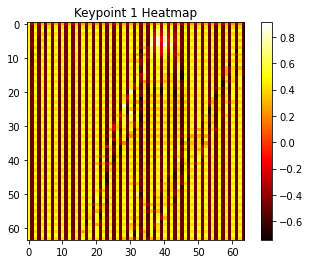

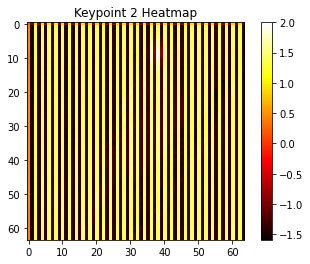

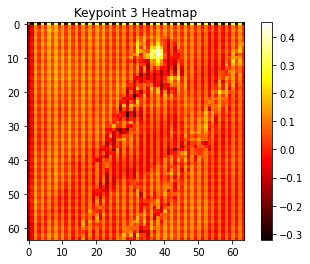

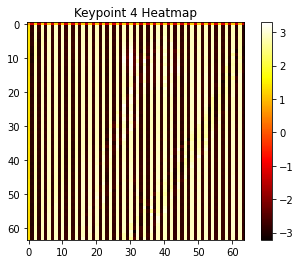

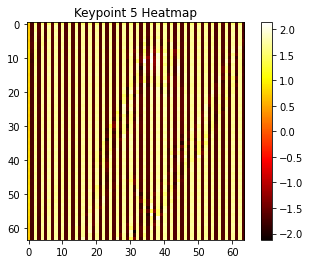

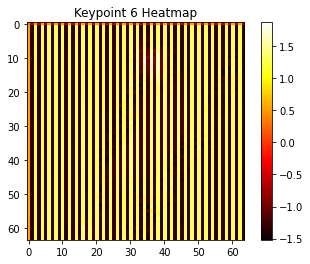

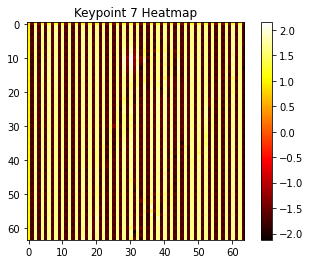

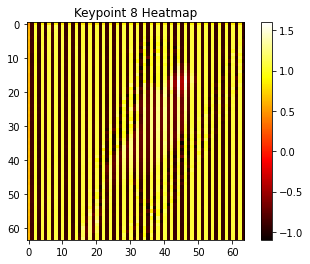

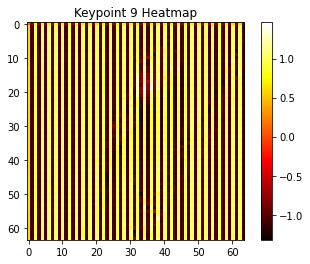

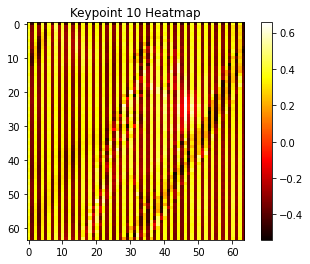

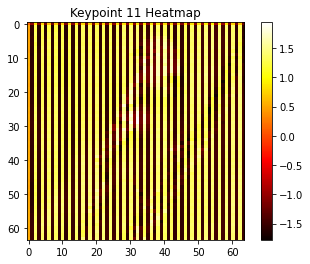

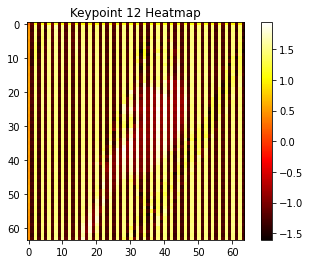

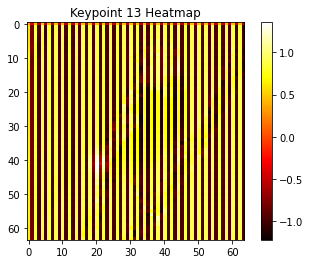

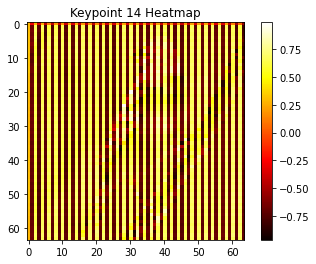

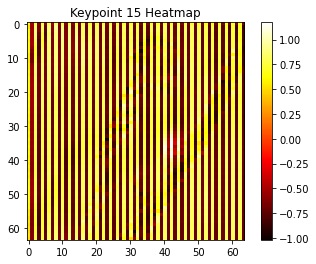

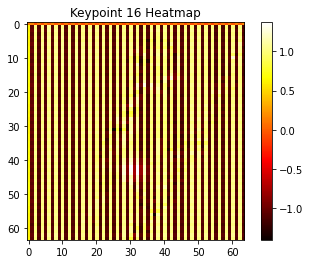

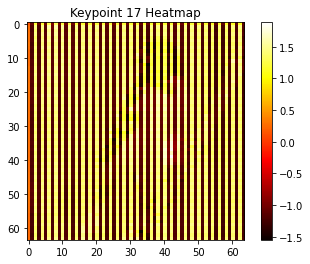

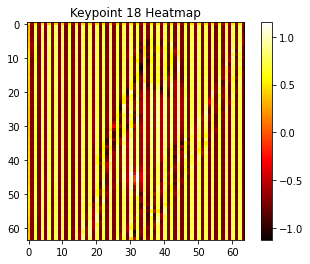

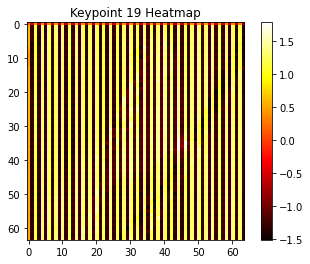

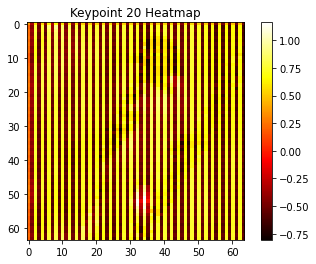

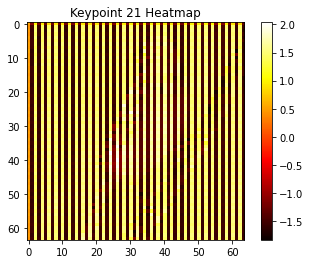

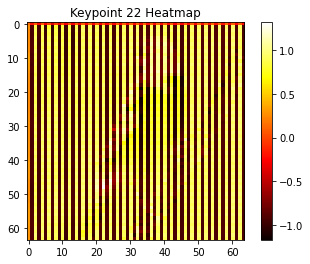

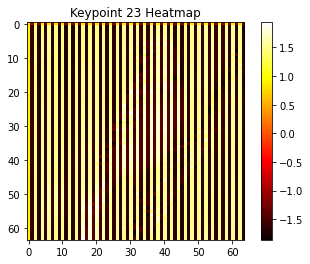

In [57]:
import matplotlib.pyplot as plt

# Get the keypoint heatmaps
pred = output[-1].squeeze().numpy()  # Assuming output is a Torch tensor

# Iterate over each keypoint heatmap
for i in range(pred.shape[0]):
    plt.figure()
    plt.imshow(pred[i], cmap='hot')  # Use 'hot' colormap for visualization
    plt.colorbar()  # Add a colorbar for reference
    plt.title(f'Keypoint {i+1} Heatmap')
    plt.show()


In [ ]:
# get the keypoint heatmap
pred = output[-1].squeeze().numpy()
plt.imshow(pred)
plt.show()